# CSE 6369 - Spring 2023 - Homework 1


## Student Name: Krishna Khadka


## Student ID: 1001751624

# Install packages

In [2]:
!pip install gymnasium==0.27.1 -q
!pip install gymnasium[box2d] -q
!pip install moviepy -q
!pip install -U kora -q

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tabgan 1.2.1 requires scikit-learn==0.23.2, but you have scikit-learn 1.1.3 which is incompatible.


# Import libraries

In [3]:
import pickle
import random
import argparse
import moviepy
import matplotlib.pyplot as plt
import seaborn as sns
from kora.drive import upload_public
from google.colab import drive

drive.mount('/content/gdrive')
%cd gdrive/MyDrive/assign_01/

from learning_algorithms import PGTrainer
from utils import seed_everything

# Train an agent

In [8]:
# set simulation parameters
params = {
    'env_name': 'CartPole-v1',
    'rng_seed': 6369,
    'reward_to_go': True,
    'reward_discount': False,
    'n_rollout': 10,
    'n_trajectory_per_rollout': 2,
    'hidden_dim': 32,
    'lr': 3e-3,
    'exp_name': 'CartPole_v1_t1'
}

# Seed RNGs
seed_everything(params['rng_seed'])

# Train agent
trainer = PGTrainer(params)
trainer.run_training_loop()

# Display Video

In [ ]:
# (ref: https://stackoverflow.com/questions/48376580/google-colab-how-to-read-data-from-my-google-drive)
# Upload video
url = upload_public('CartPole/rl-video-episode-0.mp4')
# Then display it
from IPython.display import HTML
HTML(f"""<video src={url} width=500 controls/>""")

# Visualize learning curve

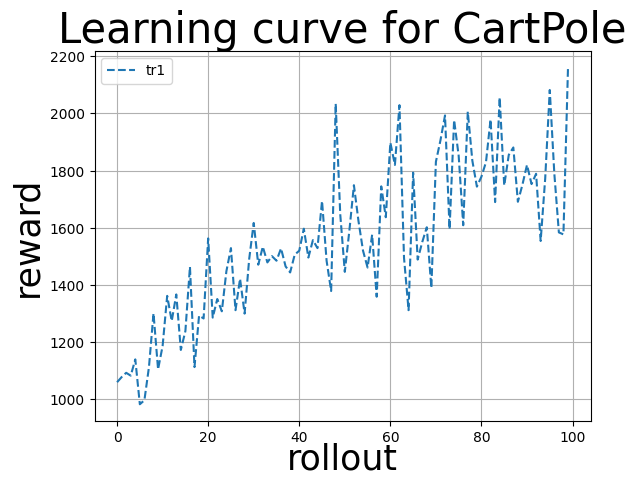

In [9]:
# (ref: http://rail.eecs.berkeley.edu/deeprlcourse/static/misc/viz.pdf)
file_name = params['CartPole_v1_t2'] + '.pkl'
with open(file_name, 'rb') as f:
    ro_reward = pickle.load(f)

# Plot the data
sns.lineplot(data=ro_reward, linestyle='--', label='tr1')
plt.xlabel('rollout', fontsize=25, labelpad=-2)
plt.ylabel('reward', fontsize=25)
plt.title('Learning curve for CartPole', fontsize=30)
plt.legend()
plt.grid()
plt.show()

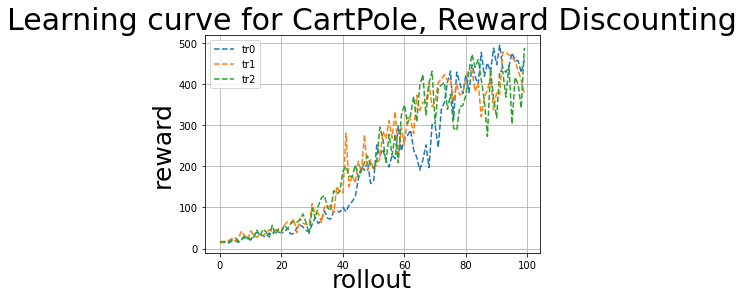

In [19]:
#Bonus
# I have tried with seed 30 and 40

file_names = [
    'CartPole_v1_t2' + '.pkl',
    'CartPole_v1_t2_30' + '.pkl',
    'CartPole_v1_t2_40' + '.pkl'
]

# Load the data from each file and store it in a list
rewards = []
for file_name in file_names:
    with open(file_name, 'rb') as f:
        rewards.append(pickle.load(f))

# Plot the data for each trial
for i, reward in enumerate(rewards):
    sns.lineplot(data=reward, linestyle='--', label=f'tr{i}')

# Add labels and legend to the plot
plt.xlabel('rollout', fontsize=25, labelpad=-2)
plt.ylabel('reward', fontsize=25)
plt.title('Learning curve for CartPole, Reward Discounting', fontsize=30)
plt.legend()
plt.grid()

# Show the plot
plt.show()

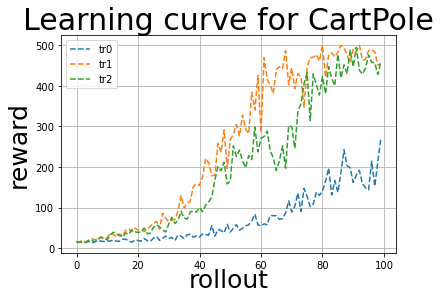

In [20]:
file_names = [
    'CartPole_v1_t0' + '.pkl',
    'CartPole_v1_t1' + '.pkl',
    'CartPole_v1_t2' + '.pkl'
]

# Load the data from each file and store it in a list
rewards = []
for file_name in file_names:
    with open(file_name, 'rb') as f:
        rewards.append(pickle.load(f))

# Plot the data for each trial
for i, reward in enumerate(rewards):
    sns.lineplot(data=reward, linestyle='--', label=f'tr{i}')

# Add labels and legend to the plot
plt.xlabel('rollout', fontsize=25, labelpad=-2)
plt.ylabel('reward', fontsize=25)
plt.title('Learning curve for CartPole', fontsize=30)
plt.legend()
plt.grid()

# Show the plot
plt.show()

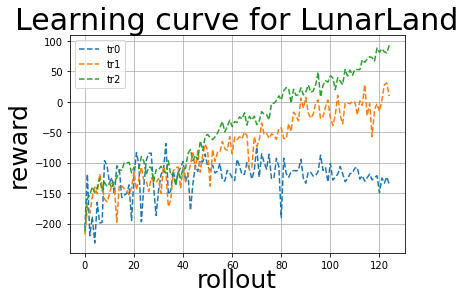

In [21]:
file_names = [
    'LunarLand_v2_t0' + '.pkl',
    'LunarLand_v2_t1' + '.pkl',
    'LunarLand_v2_t2' + '.pkl'
]

# Load the data from each file and store it in a list
rewards = []
for file_name in file_names:
    with open(file_name, 'rb') as f:
        rewards.append(pickle.load(f))

# Plot the data for each trial
for i, reward in enumerate(rewards):
    sns.lineplot(data=reward, linestyle='--', label=f'tr{i}')

# Add labels and legend to the plot
plt.xlabel('rollout', fontsize=25, labelpad=-2)
plt.ylabel('reward', fontsize=25)
plt.title('Learning curve for LunarLand', fontsize=30)
plt.legend()
plt.grid()

# Show the plot
plt.show()